<a href="https://colab.research.google.com/github/vyshnavinellore/2216129_AIML_BootCamp/blob/main/BULLY_COMMENTS_CLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [4]:
import pandas as pd
import numpy as np
df=pd.read_json("/content/sample_data/Dataset.json",lines=True)

In [5]:
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [6]:
df["label"] = df.annotation.apply(lambda x: x.get('label'))
df["label"] = df.label.apply(lambda x: x[0])

df

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1
...,...,...,...,...
19996,I dont. But what is complaining about it goi...,"{'notes': '', 'label': ['0']}",NaN,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,"{'notes': '', 'label': ['0']}",NaN,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,"{'notes': '', 'label': ['0']}",NaN,0
19999,What&;s something unique about Ohio? :),"{'notes': '', 'label': ['0']}",NaN,0


In [7]:
df.head()

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1


In [9]:
df = df.drop(['annotation','extras'],axis='columns')

In [10]:
bully = df[df.label==1]
nonbully = df[df.label==0]

In [11]:
df.head()

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


In [12]:
x=df.iloc[:,:-1].values#independent-content
y=df.iloc[:,-1:].values#dependent-label

In [13]:
x

array([[' Get fucking real dude.'],
       [" She is as dirty as they come  and that crook Rengel  the Dems are so fucking corrupt it's a joke. Make Republicans look like  ..."],
       [" why did you fuck it up. I could do it all day too. Let's do it when you have an hour. Ping me later to sched writing a book here."],
       ...,
       ['  hahahahaha >:) im evil mwahahahahahahahahaha'],
       [' What&;s something unique about Ohio? :)'],
       [' Who is the biggest gossiper you know?']], dtype=object)

In [14]:
y

array([['1'],
       ['1'],
       ['1'],
       ...,
       ['0'],
       ['0'],
       ['0']], dtype=object)

In [15]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)

In [16]:
x_train

array([['You know all about some interpretive gay dancing.'],
       ['depends on your plan. if you pay out the ass for it  no.'],
       ["ripping off Emo Phillips + ba-dum-bum jokes wouldn't get my vote even if i was the web-voter type."],
       ...,
       ['ass get out its ur last day damn it!'],
       ['fucking awesome - I need to play that again'],
       ['fuck duke!']], dtype=object)

In [17]:
x_test

array([['I miss you you crazy fuck.'],
       [' Are you listening to any music right now?  If so  what is it?'],
       ['#NAME?'],
       ...,
       ['  okay forsurre(::'],
       ["I'd hate to sound jaded  but daft punk ruined everyone else because they could never come close. :( robot human"],
       ["The JVC (LCD) Reference Monitor I have is  in a word  awe-fucking-some. :)  It's great  accurate and as good as it gets. It's ~ $4k"]],
      dtype=object)

In [18]:
y_test

array([['0'],
       ['0'],
       ['1'],
       ...,
       ['0'],
       ['0'],
       ['1']], dtype=object)

In [19]:
#preprocessing
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
print(count_vector)

CountVectorizer()


In [20]:
#fit_tranform,transform#transform the training data into freq vectors and return the matrix
training_data=count_vector.fit_transform(x_train.flatten())
#fit_tranform,transform#transform the testing data into freq vectors and return the matrix
testing_data=count_vector.transform(x_test.flatten())

In [21]:
x_train.shape

(16000, 1)

In [22]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(training_data,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [23]:
y_pred=model.predict(testing_data)
y_pred

array(['1', '0', '0', ..., '0', '0', '1'], dtype='<U1')

In [26]:
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['1' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['0' '0']
 ['1' '1']]


In [27]:
print("predicted value for training data:",model.score(training_data,y_train))
print("predicted value for testing data:",model.score(testing_data,y_test))

predicted value for training data: 0.882125
predicted value for testing data: 0.7933016745813547


In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))#TN FN FP TP

[[1985  417]
 [ 410 1189]]
0.7933016745813547


In [29]:
TN=1985
FN=417
FP=410
TP=1189
accuracy_naive=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_naive*100)

79.33016745813546


In [30]:
bully = df[df.label==1]
nonbully = df[df.label==0]

In [31]:
x=df.iloc[:,:-1].values#independent-content
y=df.iloc[:,-1:].values#dependent-label

In [32]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)

In [33]:
#preprocessing
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
print(count_vector)

CountVectorizer()


In [34]:
#fit_tranform,transform#transform the training data into freq vectors and return the matrix
training_data=count_vector.fit_transform(x_train.flatten())
#fit_tranform,transform#transform the testing data into freq vectors and return the matrix
testing_data=count_vector.transform(x_test.flatten())

In [35]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(training_data,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [36]:
y_pred=logistic.predict(testing_data)
y_pred

array(['1', '0', '0', ..., '0', '1', '1'], dtype=object)

In [37]:
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['1' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['1' '0']
 ['1' '1']]


In [38]:
print("predicted value for training data:",logistic.score(training_data,y_train))
print("predicted value for testing data:",logistic.score(testing_data,y_test))

predicted value for training data: 0.9328125
predicted value for testing data: 0.8250437390652337


In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))#TN FN FP TP

[[1965  437]
 [ 263 1336]]
0.8250437390652337


In [41]:
TN=1965
FN=437
FP=263
TP=1336
accuracy_logistic=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_logistic*100)

82.50437390652337


In [42]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)

In [43]:
#preprocessing
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
print(count_vector)

CountVectorizer()


In [44]:
#fit_tranform,transform#transform the training data into freq vectors and return the matrix
training_data=count_vector.fit_transform(x_train.flatten())
#fit_tranform,transform#transform the testing data into freq vectors and return the matrix
testing_data=count_vector.transform(x_test.flatten())

In [45]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(training_data,y_train)

DecisionTreeClassifier()

In [46]:
y_pred=tree.predict(testing_data)
y_pred

array(['0', '0', '0', ..., '0', '1', '1'], dtype=object)

In [47]:
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['0' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['1' '0']
 ['1' '1']]


In [48]:
print("predicted value for training data:",tree.score(training_data,y_train))
print("predicted value for testing data:",tree.score(testing_data,y_test))

predicted value for training data: 0.9956875
predicted value for testing data: 0.8532866783304174


In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))#TN FN FP TP

[[1898  504]
 [  83 1516]]
0.8532866783304174


In [50]:
TN=1916
FN=486
FP=85
TP=1514
accuracy_decision=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_decision*100)

85.72856785803549


In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(training_data,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [52]:
y_pred=knn.predict(testing_data)
y_pred

array(['1', '0', '0', ..., '0', '0', '1'], dtype=object)

In [53]:
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['1' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['0' '0']
 ['1' '1']]


In [54]:
print("predicted value for training data:",knn.score(training_data,y_train))
print("predicted value for testing data:",knn.score(testing_data,y_test))

predicted value for training data: 0.8146875
predicted value for testing data: 0.6985753561609598


In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))#TN FN FP TP

[[1684  718]
 [ 488 1111]]
0.6985753561609598


In [56]:
TN=1684
FN=718
FP=488
TP=1111
accuracy_knn=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_knn*100)

69.85753561609597


In [57]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(training_data,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [58]:
y_pred=random.predict(testing_data)
y_pred

array(['1', '0', '0', ..., '0', '0', '1'], dtype=object)

In [59]:
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['1' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['0' '0']
 ['1' '1']]


In [60]:
print("predicted value for training data:",random.score(training_data,y_train))
print("predicted value for testing data:",random.score(testing_data,y_test))

predicted value for training data: 0.9956875
predicted value for testing data: 0.9255186203449137


In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))#TN FN FP TP

[[2197  205]
 [  93 1506]]
0.9255186203449137


In [62]:
TN=2180
FN=222
FP=88
TP=1511
accuracy_random=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_random*100)

92.25193701574607


In [63]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(training_data,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [64]:
y_pred=svm.predict(testing_data)
y_pred

array(['1', '0', '0', ..., '0', '0', '1'], dtype=object)

In [65]:
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['1' '0']
 ['0' '0']
 ['0' '1']
 ...
 ['0' '0']
 ['0' '0']
 ['1' '1']]


In [66]:
print("predicted value for training data:",svm.score(training_data,y_train))
print("predicted value for testing data:",svm.score(testing_data,y_test))

predicted value for training data: 0.9600625
predicted value for testing data: 0.8795301174706324


In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))#TN FN FP TP

[[2114  288]
 [ 194 1405]]
0.8795301174706324


In [68]:
TN=2114
FN=288
FP=194
TP=1405
accuracy_svm=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_svm*100)

87.95301174706324


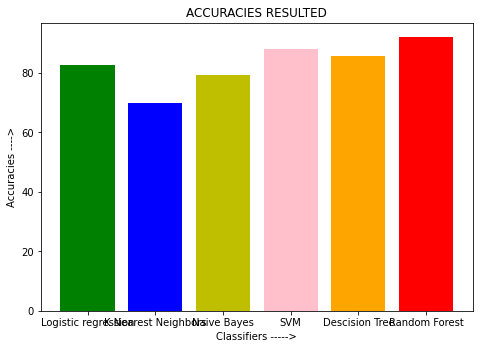

In [69]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

algo = ['Logistic regression','K Nearest Neighbors','Naive Bayes','SVM','Descision Tree','Random Forest']

accuracy = [accuracy_logistic*100,accuracy_knn*100,accuracy_naive*100,accuracy_svm*100,accuracy_decision*100,accuracy_random*100]

ax.bar(algo[0],accuracy[0],color = 'g')

ax.bar(algo[1],accuracy[1],color = 'b')

ax.bar(algo[2],accuracy[2],color = 'y')

ax.bar(algo[3],accuracy[3],color = 'pink')

ax.bar(algo[4],accuracy[4],color = 'orange')

ax.bar(algo[5],accuracy[5],color = 'r')



plt.xlabel('Classifiers ----->')

plt.ylabel('Accuracies ---->')

plt.title('ACCURACIES RESULTED')

plt.show()